In [1]:
import os
os.chdir('e:\\coding')
os.getcwd()



FileNotFoundError: [WinError 3] The system cannot find the path specified: 'e:\\coding'

In [42]:
from os import system
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tensorflow as tf
from keras.layers import Dropout
import pandas as pd
import numpy as np
import pickle
import sys
import itertools
import time
from textwrap import wrap

In [43]:
num_com,char_com,accuracy_list,F_score,recall_list,precision_list,names,Time=[[] for _ in range(8)]

In [44]:
def title(i):
    name=""
    for e in char_com[i]:
        name= e+"."+name
    return(name)

def create_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu'), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=12, activation= 'softmax')])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
    return model
    
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred

In [45]:
path="final_data.csv"
df = pd.read_csv(path)

In [46]:
# df

In [47]:
features =[2,3,4,7,8,9,10,13]
for L in range(1,len(features) + 1):
    for subset in itertools.combinations(features, L):
        num_com.append(list(subset))


features = ['x_bar(ni)','M(ni)','std(ni)','R(ni)','x_bar(nid)','M(nid)','std(nid)','R(nid)']
for L in range(1,len(features) + 1):
    for subset in itertools.combinations(features, L):
        char_com.append(list(subset))

le = LabelEncoder()
sc = StandardScaler()
df['polymer'] = le.fit_transform(df["polymer"])
df[df.columns[2:]]=sc.fit_transform(df[df.columns[2:]])
Y = df[df.columns[1]].values

Epoch 1/500
34/34 [==============================] - 2s 19ms/step - loss: 2.2444 - accuracy: 0.2227 - val_loss: 2.0377 - val_accuracy: 0.4292
Epoch 2/500
34/34 [==============================] - 0s 7ms/step - loss: 1.8109 - accuracy: 0.4361 - val_loss: 1.6441 - val_accuracy: 0.4792
Epoch 3/500
34/34 [==============================] - 0s 7ms/step - loss: 1.4281 - accuracy: 0.5083 - val_loss: 1.2633 - val_accuracy: 0.5750
Epoch 4/500
34/34 [==============================] - 0s 8ms/step - loss: 1.1133 - accuracy: 0.6116 - val_loss: 0.9989 - val_accuracy: 0.7375
Epoch 5/500
34/34 [==============================] - 0s 7ms/step - loss: 0.9500 - accuracy: 0.6593 - val_loss: 0.8981 - val_accuracy: 0.7083
Epoch 6/500
34/34 [==============================] - 0s 8ms/step - loss: 0.8623 - accuracy: 0.6741 - val_loss: 0.8599 - val_accuracy: 0.6958
Epoch 7/500
34/34 [==============================] - 0s 7ms/step - loss: 0.8108 - accuracy: 0.6856 - val_loss: 0.8344 - val_accuracy: 0.7083
Epoch 8/500


Epoch 59/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4466 - accuracy: 0.8157 - val_loss: 0.4791 - val_accuracy: 0.8500
Epoch 60/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4447 - accuracy: 0.8162 - val_loss: 0.4411 - val_accuracy: 0.8458
Epoch 61/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4367 - accuracy: 0.8153 - val_loss: 0.4465 - val_accuracy: 0.8375
Epoch 62/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4265 - accuracy: 0.8167 - val_loss: 0.4625 - val_accuracy: 0.8417
Epoch 63/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4307 - accuracy: 0.8255 - val_loss: 0.4842 - val_accuracy: 0.8583
Epoch 64/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4195 - accuracy: 0.8139 - val_loss: 0.4450 - val_accuracy: 0.8292
Epoch 65/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4293 - accuracy: 0.8148 - val_loss: 0.4338 - val_accuracy: 0.8542
Epoch 

34/34 [==============================] - 0s 7ms/step - loss: 0.5949 - accuracy: 0.7588 - val_loss: 0.5794 - val_accuracy: 0.7833
Epoch 26/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5950 - accuracy: 0.7560 - val_loss: 0.5571 - val_accuracy: 0.7958
Epoch 27/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5930 - accuracy: 0.7509 - val_loss: 0.5771 - val_accuracy: 0.7625
Epoch 28/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5899 - accuracy: 0.7616 - val_loss: 0.5531 - val_accuracy: 0.8000
Epoch 29/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5781 - accuracy: 0.7699 - val_loss: 0.5512 - val_accuracy: 0.7917
Epoch 30/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5720 - accuracy: 0.7681 - val_loss: 0.5414 - val_accuracy: 0.8000
Epoch 31/500
34/34 [==============================] - 0s 8ms/step - loss: 0.5724 - accuracy: 0.7574 - val_loss: 0.5348 - val_accuracy: 0.8125
Epoch 32/500
34/34 

Epoch 83/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3663 - accuracy: 0.8407 - val_loss: 0.3722 - val_accuracy: 0.8500
Epoch 84/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3685 - accuracy: 0.8463 - val_loss: 0.3583 - val_accuracy: 0.8542
Epoch 85/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3697 - accuracy: 0.8412 - val_loss: 0.3715 - val_accuracy: 0.8458
Epoch 86/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3684 - accuracy: 0.8458 - val_loss: 0.3605 - val_accuracy: 0.8500
Epoch 87/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3593 - accuracy: 0.8532 - val_loss: 0.3549 - val_accuracy: 0.8542
Epoch 88/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3699 - accuracy: 0.8431 - val_loss: 0.3726 - val_accuracy: 0.8292
Epoch 89/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3678 - accuracy: 0.8398 - val_loss: 0.3659 - val_accuracy: 0.8417
Epoch 

34/34 [==============================] - 0s 7ms/step - loss: 0.3310 - accuracy: 0.8579 - val_loss: 0.3602 - val_accuracy: 0.8458
Epoch 141/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3322 - accuracy: 0.8644 - val_loss: 0.3314 - val_accuracy: 0.8708
Epoch 142/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3122 - accuracy: 0.8671 - val_loss: 0.3261 - val_accuracy: 0.8417
Epoch 143/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3283 - accuracy: 0.8644 - val_loss: 0.3393 - val_accuracy: 0.8625
Epoch 144/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3307 - accuracy: 0.8611 - val_loss: 0.3450 - val_accuracy: 0.8333
Epoch 145/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3234 - accuracy: 0.8606 - val_loss: 0.3540 - val_accuracy: 0.8458
Epoch 146/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3137 - accuracy: 0.8657 - val_loss: 0.3320 - val_accuracy: 0.8458
Epoch 147/500

34/34 [==============================] - 0s 7ms/step - loss: 0.5107 - accuracy: 0.7884 - val_loss: 0.5595 - val_accuracy: 0.7583
Epoch 46/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5198 - accuracy: 0.7782 - val_loss: 0.5443 - val_accuracy: 0.7833
Epoch 47/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4954 - accuracy: 0.7935 - val_loss: 0.5468 - val_accuracy: 0.7583
Epoch 48/500
34/34 [==============================] - 0s 8ms/step - loss: 0.5002 - accuracy: 0.7907 - val_loss: 0.5547 - val_accuracy: 0.7583
Epoch 49/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5074 - accuracy: 0.7815 - val_loss: 0.5442 - val_accuracy: 0.7583
Epoch 50/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4917 - accuracy: 0.8028 - val_loss: 0.5279 - val_accuracy: 0.7708
Epoch 51/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4921 - accuracy: 0.7981 - val_loss: 0.5296 - val_accuracy: 0.7542
Epoch 52/500
34/34 

Epoch 103/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3621 - accuracy: 0.8356 - val_loss: 0.4517 - val_accuracy: 0.8125
Epoch 104/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3621 - accuracy: 0.8394 - val_loss: 0.4321 - val_accuracy: 0.8500
Epoch 105/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3719 - accuracy: 0.8282 - val_loss: 0.4534 - val_accuracy: 0.8000
Epoch 106/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3612 - accuracy: 0.8407 - val_loss: 0.4689 - val_accuracy: 0.7958
Epoch 107/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3644 - accuracy: 0.8426 - val_loss: 0.4314 - val_accuracy: 0.8292
Epoch 108/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3684 - accuracy: 0.8245 - val_loss: 0.4621 - val_accuracy: 0.8250
Epoch 109/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3553 - accuracy: 0.8458 - val_loss: 0.4437 - val_accuracy: 0.8333

34/34 [==============================] - 0s 8ms/step - loss: 0.3277 - accuracy: 0.8583 - val_loss: 0.4343 - val_accuracy: 0.8167
Epoch 161/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3117 - accuracy: 0.8634 - val_loss: 0.4211 - val_accuracy: 0.8542
Epoch 162/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3049 - accuracy: 0.8699 - val_loss: 0.4192 - val_accuracy: 0.8542
Epoch 163/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3192 - accuracy: 0.8556 - val_loss: 0.4324 - val_accuracy: 0.8458
Epoch 164/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3169 - accuracy: 0.8611 - val_loss: 0.4140 - val_accuracy: 0.8417
Epoch 165/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3206 - accuracy: 0.8583 - val_loss: 0.4242 - val_accuracy: 0.8292
Epoch 166/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3097 - accuracy: 0.8606 - val_loss: 0.4095 - val_accuracy: 0.8333
Epoch 167/500

Epoch 11/500
34/34 [==============================] - 0s 7ms/step - loss: 0.7298 - accuracy: 0.7176 - val_loss: 0.6812 - val_accuracy: 0.7333
Epoch 12/500
34/34 [==============================] - 0s 8ms/step - loss: 0.7145 - accuracy: 0.7157 - val_loss: 0.6734 - val_accuracy: 0.7500
Epoch 13/500
34/34 [==============================] - 0s 7ms/step - loss: 0.7046 - accuracy: 0.7125 - val_loss: 0.6669 - val_accuracy: 0.7625
Epoch 14/500
34/34 [==============================] - 0s 8ms/step - loss: 0.6904 - accuracy: 0.7222 - val_loss: 0.6565 - val_accuracy: 0.7500
Epoch 15/500
34/34 [==============================] - 0s 8ms/step - loss: 0.6715 - accuracy: 0.7356 - val_loss: 0.6489 - val_accuracy: 0.7333
Epoch 16/500
34/34 [==============================] - 0s 7ms/step - loss: 0.6642 - accuracy: 0.7407 - val_loss: 0.6403 - val_accuracy: 0.7625
Epoch 17/500
34/34 [==============================] - 0s 7ms/step - loss: 0.6603 - accuracy: 0.7463 - val_loss: 0.6380 - val_accuracy: 0.7708
Epoch 

Epoch 69/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4188 - accuracy: 0.8208 - val_loss: 0.4373 - val_accuracy: 0.8208
Epoch 70/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4053 - accuracy: 0.8301 - val_loss: 0.4467 - val_accuracy: 0.7958
Epoch 71/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4216 - accuracy: 0.8208 - val_loss: 0.4522 - val_accuracy: 0.8042
Epoch 72/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4188 - accuracy: 0.8264 - val_loss: 0.4899 - val_accuracy: 0.8083
Epoch 73/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4272 - accuracy: 0.8093 - val_loss: 0.4917 - val_accuracy: 0.7750
Epoch 74/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.8185 - val_loss: 0.4359 - val_accuracy: 0.8250
Epoch 75/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4115 - accuracy: 0.8329 - val_loss: 0.4337 - val_accuracy: 0.8292
Epoch 

34/34 [==============================] - 0s 8ms/step - loss: 0.3520 - accuracy: 0.8495 - val_loss: 0.4065 - val_accuracy: 0.8083
Epoch 127/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3492 - accuracy: 0.8472 - val_loss: 0.3759 - val_accuracy: 0.8542
Epoch 128/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3406 - accuracy: 0.8486 - val_loss: 0.3794 - val_accuracy: 0.8125
Epoch 129/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3445 - accuracy: 0.8468 - val_loss: 0.3633 - val_accuracy: 0.8583
Epoch 130/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3361 - accuracy: 0.8537 - val_loss: 0.3704 - val_accuracy: 0.8375
Epoch 131/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3279 - accuracy: 0.8671 - val_loss: 0.3599 - val_accuracy: 0.8125
Epoch 132/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3189 - accuracy: 0.8685 - val_loss: 0.3476 - val_accuracy: 0.8458
Epoch 133/500

Epoch 4/500
34/34 [==============================] - 0s 7ms/step - loss: 1.2340 - accuracy: 0.5838 - val_loss: 1.1165 - val_accuracy: 0.5917
Epoch 5/500
34/34 [==============================] - 0s 8ms/step - loss: 1.0665 - accuracy: 0.6352 - val_loss: 0.9671 - val_accuracy: 0.6958
Epoch 6/500
34/34 [==============================] - 0s 7ms/step - loss: 0.9440 - accuracy: 0.6722 - val_loss: 0.8659 - val_accuracy: 0.7292
Epoch 7/500
34/34 [==============================] - 0s 7ms/step - loss: 0.8612 - accuracy: 0.6884 - val_loss: 0.7978 - val_accuracy: 0.7417
Epoch 8/500
34/34 [==============================] - 0s 7ms/step - loss: 0.8139 - accuracy: 0.6944 - val_loss: 0.7633 - val_accuracy: 0.7500
Epoch 9/500
34/34 [==============================] - 0s 7ms/step - loss: 0.7863 - accuracy: 0.7019 - val_loss: 0.7419 - val_accuracy: 0.7583
Epoch 10/500
34/34 [==============================] - 0s 7ms/step - loss: 0.7571 - accuracy: 0.7157 - val_loss: 0.7211 - val_accuracy: 0.7417
Epoch 11/500

Epoch 62/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4113 - accuracy: 0.8301 - val_loss: 0.4255 - val_accuracy: 0.8250
Epoch 63/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4074 - accuracy: 0.8241 - val_loss: 0.4041 - val_accuracy: 0.8708
Epoch 64/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3998 - accuracy: 0.8319 - val_loss: 0.4067 - val_accuracy: 0.8500
Epoch 65/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4041 - accuracy: 0.8319 - val_loss: 0.4095 - val_accuracy: 0.8792
Epoch 66/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4139 - accuracy: 0.8241 - val_loss: 0.4033 - val_accuracy: 0.8625
Epoch 67/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4016 - accuracy: 0.8231 - val_loss: 0.4012 - val_accuracy: 0.8458
Epoch 68/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3983 - accuracy: 0.8375 - val_loss: 0.3963 - val_accuracy: 0.8750
Epoch 

34/34 [==============================] - 0s 8ms/step - loss: 0.3447 - accuracy: 0.8486 - val_loss: 0.3857 - val_accuracy: 0.8542
Epoch 120/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3414 - accuracy: 0.8579 - val_loss: 0.3970 - val_accuracy: 0.8708
Epoch 121/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3377 - accuracy: 0.8519 - val_loss: 0.3915 - val_accuracy: 0.8667
Epoch 122/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3447 - accuracy: 0.8519 - val_loss: 0.3860 - val_accuracy: 0.8458
Epoch 123/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3456 - accuracy: 0.8491 - val_loss: 0.3997 - val_accuracy: 0.8542
Epoch 124/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3481 - accuracy: 0.8421 - val_loss: 0.3923 - val_accuracy: 0.8500
Epoch 125/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3447 - accuracy: 0.8546 - val_loss: 0.3866 - val_accuracy: 0.8708
Epoch 125: ea

34/34 [==============================] - 0s 9ms/step - loss: 0.4671 - accuracy: 0.8051 - val_loss: 0.4246 - val_accuracy: 0.8333
Epoch 51/500
34/34 [==============================] - 0s 6ms/step - loss: 0.4535 - accuracy: 0.8185 - val_loss: 0.4111 - val_accuracy: 0.8625
Epoch 52/500
34/34 [==============================] - 0s 11ms/step - loss: 0.4552 - accuracy: 0.8120 - val_loss: 0.4304 - val_accuracy: 0.8042
Epoch 53/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4557 - accuracy: 0.8079 - val_loss: 0.4021 - val_accuracy: 0.8542
Epoch 54/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4378 - accuracy: 0.8236 - val_loss: 0.3943 - val_accuracy: 0.8417
Epoch 55/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4411 - accuracy: 0.8153 - val_loss: 0.3935 - val_accuracy: 0.8500
Epoch 56/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4408 - accuracy: 0.8157 - val_loss: 0.4029 - val_accuracy: 0.8333
Epoch 57/500
34/34

Epoch 108/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3347 - accuracy: 0.8546 - val_loss: 0.3587 - val_accuracy: 0.8500
Epoch 109/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3375 - accuracy: 0.8537 - val_loss: 0.3595 - val_accuracy: 0.8500
Epoch 110/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3460 - accuracy: 0.8583 - val_loss: 0.3373 - val_accuracy: 0.8583
Epoch 111/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3331 - accuracy: 0.8560 - val_loss: 0.3341 - val_accuracy: 0.8667
Epoch 112/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3353 - accuracy: 0.8528 - val_loss: 0.3489 - val_accuracy: 0.8417
Epoch 113/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3467 - accuracy: 0.8481 - val_loss: 0.3376 - val_accuracy: 0.8625
Epoch 114/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3362 - accuracy: 0.8472 - val_loss: 0.3435 - val_accuracy: 0.8500

Epoch 28/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5874 - accuracy: 0.7597 - val_loss: 0.5528 - val_accuracy: 0.7792
Epoch 29/500
34/34 [==============================] - 0s 8ms/step - loss: 0.5883 - accuracy: 0.7546 - val_loss: 0.5718 - val_accuracy: 0.7833
Epoch 30/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5804 - accuracy: 0.7532 - val_loss: 0.5516 - val_accuracy: 0.7667
Epoch 31/500
34/34 [==============================] - 0s 8ms/step - loss: 0.5725 - accuracy: 0.7690 - val_loss: 0.5347 - val_accuracy: 0.7917
Epoch 32/500
34/34 [==============================] - 0s 8ms/step - loss: 0.5635 - accuracy: 0.7810 - val_loss: 0.5536 - val_accuracy: 0.8042
Epoch 33/500
34/34 [==============================] - 0s 8ms/step - loss: 0.5524 - accuracy: 0.7708 - val_loss: 0.5398 - val_accuracy: 0.7833
Epoch 34/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5523 - accuracy: 0.7750 - val_loss: 0.5367 - val_accuracy: 0.8083
Epoch 

Epoch 86/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3867 - accuracy: 0.8356 - val_loss: 0.3729 - val_accuracy: 0.8292
Epoch 87/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3874 - accuracy: 0.8458 - val_loss: 0.3706 - val_accuracy: 0.8708
Epoch 88/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3792 - accuracy: 0.8380 - val_loss: 0.3649 - val_accuracy: 0.8750
Epoch 89/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3820 - accuracy: 0.8343 - val_loss: 0.3898 - val_accuracy: 0.8500
Epoch 90/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3860 - accuracy: 0.8370 - val_loss: 0.3615 - val_accuracy: 0.8542
Epoch 91/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3772 - accuracy: 0.8417 - val_loss: 0.3663 - val_accuracy: 0.8750
Epoch 92/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3891 - accuracy: 0.8352 - val_loss: 0.3457 - val_accuracy: 0.8625
Epoch 

Epoch 23/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5701 - accuracy: 0.7801 - val_loss: 0.5437 - val_accuracy: 0.8458
Epoch 24/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5549 - accuracy: 0.7852 - val_loss: 0.5318 - val_accuracy: 0.8042
Epoch 25/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5532 - accuracy: 0.7718 - val_loss: 0.5261 - val_accuracy: 0.7958
Epoch 26/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5422 - accuracy: 0.7907 - val_loss: 0.5236 - val_accuracy: 0.8250
Epoch 27/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5464 - accuracy: 0.7782 - val_loss: 0.5057 - val_accuracy: 0.8125
Epoch 28/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5333 - accuracy: 0.7889 - val_loss: 0.5129 - val_accuracy: 0.8042
Epoch 29/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5226 - accuracy: 0.7847 - val_loss: 0.4979 - val_accuracy: 0.8000
Epoch 

Epoch 81/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3784 - accuracy: 0.8389 - val_loss: 0.3530 - val_accuracy: 0.8583
Epoch 82/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3716 - accuracy: 0.8417 - val_loss: 0.3339 - val_accuracy: 0.8500
Epoch 83/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3648 - accuracy: 0.8435 - val_loss: 0.3306 - val_accuracy: 0.8583
Epoch 84/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3657 - accuracy: 0.8435 - val_loss: 0.3330 - val_accuracy: 0.8583
Epoch 85/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3574 - accuracy: 0.8472 - val_loss: 0.3223 - val_accuracy: 0.8792
Epoch 86/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3677 - accuracy: 0.8444 - val_loss: 0.3236 - val_accuracy: 0.8625
Epoch 87/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3542 - accuracy: 0.8528 - val_loss: 0.3313 - val_accuracy: 0.8750
Epoch 

34/34 [==============================] - 0s 5ms/step - loss: 0.3205 - accuracy: 0.8630 - val_loss: 0.2933 - val_accuracy: 0.8917
Epoch 139/500
34/34 [==============================] - 0s 6ms/step - loss: 0.3176 - accuracy: 0.8588 - val_loss: 0.2749 - val_accuracy: 0.8875
Epoch 140/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3167 - accuracy: 0.8616 - val_loss: 0.2897 - val_accuracy: 0.8708
Epoch 141/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3183 - accuracy: 0.8648 - val_loss: 0.2749 - val_accuracy: 0.8875
Epoch 142/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3256 - accuracy: 0.8537 - val_loss: 0.2812 - val_accuracy: 0.8875
Epoch 143/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3108 - accuracy: 0.8620 - val_loss: 0.2967 - val_accuracy: 0.8667
Epoch 144/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3264 - accuracy: 0.8597 - val_loss: 0.2971 - val_accuracy: 0.8667
Epoch 145/500

34/34 [==============================] - 0s 7ms/step - loss: 0.2944 - accuracy: 0.8745 - val_loss: 0.2532 - val_accuracy: 0.9083
Epoch 196/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2951 - accuracy: 0.8699 - val_loss: 0.2547 - val_accuracy: 0.9042
Epoch 197/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2796 - accuracy: 0.8764 - val_loss: 0.2672 - val_accuracy: 0.8792
Epoch 198/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2913 - accuracy: 0.8769 - val_loss: 0.2720 - val_accuracy: 0.8875
Epoch 199/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2943 - accuracy: 0.8722 - val_loss: 0.2576 - val_accuracy: 0.8875
Epoch 200/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3047 - accuracy: 0.8704 - val_loss: 0.2779 - val_accuracy: 0.8958
Epoch 201/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2861 - accuracy: 0.8731 - val_loss: 0.2556 - val_accuracy: 0.9000
Epoch 202/500

34/34 [==============================] - 0s 7ms/step - loss: 0.2780 - accuracy: 0.8787 - val_loss: 0.2692 - val_accuracy: 0.8958
Epoch 253/500
34/34 [==============================] - 0s 8ms/step - loss: 0.2750 - accuracy: 0.8824 - val_loss: 0.2476 - val_accuracy: 0.8792
Epoch 254/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2855 - accuracy: 0.8759 - val_loss: 0.2560 - val_accuracy: 0.8792
Epoch 255/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2733 - accuracy: 0.8856 - val_loss: 0.2625 - val_accuracy: 0.8917
Epoch 256/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2829 - accuracy: 0.8773 - val_loss: 0.2469 - val_accuracy: 0.9083
Epoch 257/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2787 - accuracy: 0.8861 - val_loss: 0.2472 - val_accuracy: 0.9125
Epoch 258/500
34/34 [==============================] - 0s 8ms/step - loss: 0.2772 - accuracy: 0.8745 - val_loss: 0.2642 - val_accuracy: 0.8792
Epoch 259/500

34/34 [==============================] - 0s 7ms/step - loss: 0.4534 - accuracy: 0.8106 - val_loss: 0.4374 - val_accuracy: 0.8458
Epoch 49/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4397 - accuracy: 0.8199 - val_loss: 0.4260 - val_accuracy: 0.8125
Epoch 50/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4391 - accuracy: 0.8218 - val_loss: 0.4198 - val_accuracy: 0.8292
Epoch 51/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4433 - accuracy: 0.8194 - val_loss: 0.4332 - val_accuracy: 0.8333
Epoch 52/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4253 - accuracy: 0.8282 - val_loss: 0.4093 - val_accuracy: 0.8500
Epoch 53/500
34/34 [==============================] - 0s 8ms/step - loss: 0.4210 - accuracy: 0.8287 - val_loss: 0.4073 - val_accuracy: 0.8542
Epoch 54/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4226 - accuracy: 0.8319 - val_loss: 0.4088 - val_accuracy: 0.8333
Epoch 55/500
34/34 

Epoch 106/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3481 - accuracy: 0.8537 - val_loss: 0.3922 - val_accuracy: 0.8708
Epoch 107/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3465 - accuracy: 0.8454 - val_loss: 0.3603 - val_accuracy: 0.8667
Epoch 108/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3452 - accuracy: 0.8569 - val_loss: 0.3754 - val_accuracy: 0.8500
Epoch 109/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3398 - accuracy: 0.8509 - val_loss: 0.3598 - val_accuracy: 0.8708
Epoch 110/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3347 - accuracy: 0.8556 - val_loss: 0.3432 - val_accuracy: 0.8542
Epoch 111/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3441 - accuracy: 0.8519 - val_loss: 0.3546 - val_accuracy: 0.8792
Epoch 112/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3325 - accuracy: 0.8583 - val_loss: 0.3555 - val_accuracy: 0.8708

Epoch 22/500
34/34 [==============================] - 0s 8ms/step - loss: 0.6262 - accuracy: 0.7514 - val_loss: 0.6086 - val_accuracy: 0.7458
Epoch 23/500
34/34 [==============================] - 0s 7ms/step - loss: 0.6200 - accuracy: 0.7481 - val_loss: 0.6117 - val_accuracy: 0.7125
Epoch 24/500
34/34 [==============================] - 0s 8ms/step - loss: 0.6135 - accuracy: 0.7565 - val_loss: 0.6106 - val_accuracy: 0.7292
Epoch 25/500
34/34 [==============================] - 0s 8ms/step - loss: 0.6063 - accuracy: 0.7565 - val_loss: 0.6201 - val_accuracy: 0.7250
Epoch 26/500
34/34 [==============================] - 0s 7ms/step - loss: 0.6023 - accuracy: 0.7588 - val_loss: 0.6033 - val_accuracy: 0.7375
Epoch 27/500
34/34 [==============================] - 0s 8ms/step - loss: 0.5940 - accuracy: 0.7597 - val_loss: 0.6017 - val_accuracy: 0.7667
Epoch 28/500
34/34 [==============================] - 0s 7ms/step - loss: 0.5866 - accuracy: 0.7560 - val_loss: 0.5904 - val_accuracy: 0.7625
Epoch 

Epoch 80/500
34/34 [==============================] - 0s 7ms/step - loss: 0.4073 - accuracy: 0.8292 - val_loss: 0.3835 - val_accuracy: 0.8125
Epoch 81/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3968 - accuracy: 0.8315 - val_loss: 0.3852 - val_accuracy: 0.8333
Epoch 82/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3956 - accuracy: 0.8389 - val_loss: 0.3954 - val_accuracy: 0.8292
Epoch 83/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3873 - accuracy: 0.8403 - val_loss: 0.3873 - val_accuracy: 0.8125
Epoch 84/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3843 - accuracy: 0.8412 - val_loss: 0.3789 - val_accuracy: 0.8125
Epoch 85/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3908 - accuracy: 0.8407 - val_loss: 0.3787 - val_accuracy: 0.8292
Epoch 86/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3888 - accuracy: 0.8319 - val_loss: 0.3787 - val_accuracy: 0.8333
Epoch 

34/34 [==============================] - 0s 7ms/step - loss: 0.3386 - accuracy: 0.8560 - val_loss: 0.3444 - val_accuracy: 0.8458
Epoch 138/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3375 - accuracy: 0.8606 - val_loss: 0.3246 - val_accuracy: 0.8667
Epoch 139/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3359 - accuracy: 0.8556 - val_loss: 0.3369 - val_accuracy: 0.8375
Epoch 140/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3330 - accuracy: 0.8574 - val_loss: 0.3457 - val_accuracy: 0.8458
Epoch 141/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3463 - accuracy: 0.8509 - val_loss: 0.3576 - val_accuracy: 0.8375
Epoch 142/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3406 - accuracy: 0.8519 - val_loss: 0.3358 - val_accuracy: 0.8417
Epoch 143/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3371 - accuracy: 0.8556 - val_loss: 0.3380 - val_accuracy: 0.8542
Epoch 144/500

34/34 [==============================] - 0s 8ms/step - loss: 0.3088 - accuracy: 0.8671 - val_loss: 0.3083 - val_accuracy: 0.8875
Epoch 195/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3143 - accuracy: 0.8569 - val_loss: 0.3171 - val_accuracy: 0.8792
Epoch 196/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3118 - accuracy: 0.8648 - val_loss: 0.3100 - val_accuracy: 0.8833
Epoch 197/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2963 - accuracy: 0.8676 - val_loss: 0.3127 - val_accuracy: 0.8708
Epoch 198/500
34/34 [==============================] - 0s 8ms/step - loss: 0.3112 - accuracy: 0.8704 - val_loss: 0.3238 - val_accuracy: 0.8667
Epoch 199/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3421 - accuracy: 0.8505 - val_loss: 0.3054 - val_accuracy: 0.8750
Epoch 200/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3098 - accuracy: 0.8681 - val_loss: 0.3079 - val_accuracy: 0.8833
Epoch 201/500

34/34 [==============================] - 0s 8ms/step - loss: 0.2995 - accuracy: 0.8755 - val_loss: 0.3012 - val_accuracy: 0.8750
Epoch 252/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2953 - accuracy: 0.8736 - val_loss: 0.2982 - val_accuracy: 0.8833
Epoch 253/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2863 - accuracy: 0.8829 - val_loss: 0.3063 - val_accuracy: 0.8667
Epoch 254/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2966 - accuracy: 0.8731 - val_loss: 0.3415 - val_accuracy: 0.8583
Epoch 255/500
34/34 [==============================] - 0s 7ms/step - loss: 0.3061 - accuracy: 0.8671 - val_loss: 0.3018 - val_accuracy: 0.8792
Epoch 256/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2989 - accuracy: 0.8718 - val_loss: 0.3065 - val_accuracy: 0.8625
Epoch 257/500
34/34 [==============================] - 0s 7ms/step - loss: 0.2877 - accuracy: 0.8718 - val_loss: 0.2874 - val_accuracy: 0.8833
Epoch 258/500

C:\Users\shaif\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


process complete


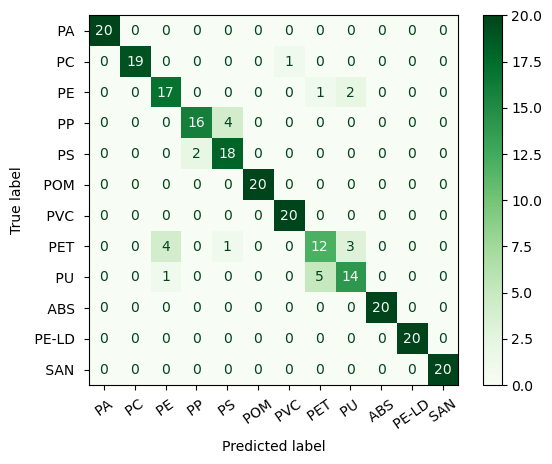

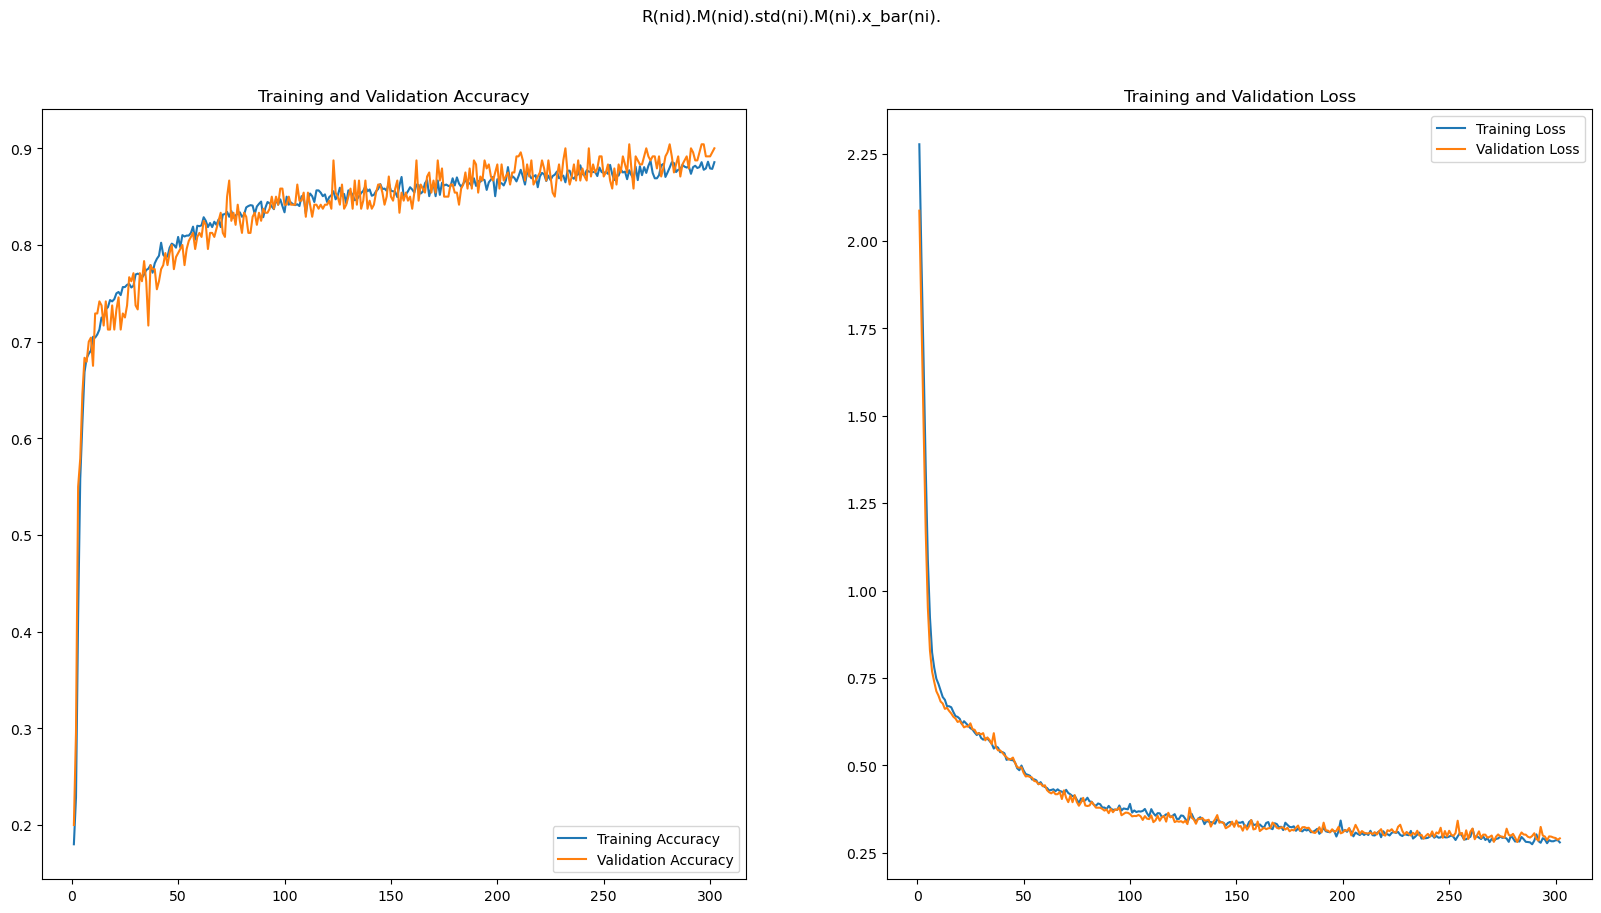

In [48]:
for i in range(170,171):    
    start = time.monotonic()
    name =title(i)
    X = df[df.columns[num_com[i]]].values
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)  
    precision_KF,accuracy_KF,recall_KF,F_one_KF=[[] for _ in range(4)]
    n_split=10
    kf=StratifiedKFold(n_split,random_state=42,shuffle=True)
    for train_index,test_index in kf.split(X,Y):
        x_train,x_test=X[train_index],X[test_index]
        y_train,y_test=Y[train_index],Y[test_index]

        model=create_model()
        
        hist=model.fit(x_train, y_train,epochs=500,batch_size=64,validation_data=(x_test, y_test),callbacks=[callback])
        loss, acc = model.evaluate(x_test, y_test, verbose=2)
        class_names = [" PA ", " PC ", " PE ", " PP ", " PS "," POM "," PVC "," PET "," PU "," ABS "," PE-LD "," SAN "]
        classifier = estimator(model, class_names)
        y_pred = model.predict(x_test, verbose=1)
        y_pred_bool = np.argmax(y_pred, axis=1)

        scores = model.evaluate(X[test_index], Y[test_index], verbose=1)
        precision=round(precision_score(y_true=y_test, y_pred=y_pred_bool,average='weighted'),4)
        recall=round(recall_score(y_true=y_test, y_pred=y_pred_bool,average='weighted'),4)
        accuracy=round(accuracy_score(y_true=y_test, y_pred=y_pred_bool),4)
        F1_score=round(f1_score(y_true=y_test, y_pred=y_pred_bool,average='weighted'),4)
        accuracy_KF.append(accuracy)
        F_one_KF.append(F1_score)
        precision_KF.append(precision)
        recall_KF.append(recall)
        

    names.append(name)
    accuracy_list.append(round(np.mean(accuracy_KF),4))
    F_score.append(round(np.mean(F_one_KF),4))
    precision_list.append(round(np.mean(precision_KF),4))
    recall_list.append(round(np.mean(recall_KF),4))
    degrees = 35

    plot=plot_confusion_matrix(estimator=classifier, X=x_test, y_true=y_test,display_labels=class_names,include_values=True,xticks_rotation=degrees,cmap='Greens')
#     plt.title('\n'.join(wrap("TensorFlow Combination:" + str(name),63)),loc='center')
#     plt.savefig("TF-Confusion-"+name+"png")

    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']

    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs_range = range(1,len(loss)+1)

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.suptitle(str(name))
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
#     plt.savefig("TF-Accuracy & Loss curve-" +name+"png")

    end = time.monotonic()
    total_time = round((end - start)/60,2)
    Time.append(total_time)
    


data=pd.DataFrame({'Name':names,'Accuracy':accuracy_list,'F1_score':F_score,'Precision':precision_list,'Recall':recall_list,'Time (min)':Time})
# data.to_excel('TF-Final1.xlsx',index=True,header=True)
print('process complete')
    

In [49]:
data

,Name,Accuracy,F1_score,Precision,Recall,Time (min)
0,R(nid).M(nid).std(ni).M(ni).x_bar(ni).,0.8633,0.8609,0.8708,0.8633,7.55


In [25]:
# model.summary()

In [10]:
<div class="burk">
file1='testing_data.csv'
df_new=pd.read_csv(file1)
df_new['polymer'] = le.fit_transform(df_new['polymer'])
df_new[df_new.columns[2:]]=sc.fit_transform(df_new[df_new.columns[2:]])
X_new = df_new[df_new.columns[[2,3,4,7,8,9,10,13]]].values
Y_new = df_new[df_new.columns[1]].values
y_pred1 = model.predict(X_new, verbose=1)
y_pred_bool1 = np.argmax(y_pred1, axis=1)
accuracy1=round(accuracy_score(y_true=Y_new, y_pred=y_pred_bool1),4)
print(accuracy1)
plot=plot_confusion_matrix(estimator=classifier, X=X_new, y_true=Y_new,display_labels=class_names,include_values=True,xticks_rotation=degrees,cmap='Greens')</div><i class="fa fa-lightbulb-o "></i>

SyntaxError: invalid syntax (159572193.py, line 1)

Testing

In [42]:
print(model.predict(sc.fit_transform([[0.012113265,0.011343059,0.002810689,0.064052677,-0.33654601,-0.365254236,0.173228243,1.58746614]])) == 1)

1/1 [==============================] - 0s 60ms/step
[[False False False False False False False False False False False False]]


In [10]:
# in saveModel format: 
model.save("x_model.h5") 



In [30]:
# # Reconstruct a new model from the final model:
# # reconstructed_model = tf.keras.models.load_model("x_model.h5") 
# # file1='testing_data.csv'
# file1='TESTING_DATA.csv'
# testing_data=pd.read_csv(file1)
# le = LabelEncoder()
# sc = StandardScaler()
# y_hat = testing_data.iloc[:,1]
# x_hat=sc.fit_transform(testing_data.iloc[:,[2,3,4,7,8,9,10,13]])
# # Reconstruct the set of losses and metric 
# # in the already compiled final model, and test it:
# # np.testing.assert_allclose( 
# #     model.predict(x_hat), reconstructed_model.predict(x_hat)
# # )
# print(y_hat)
# # Resume training on the reconstructed model:
# # reconstructed_model.fit(x_hat, y_hat) 

1/1 [==============================] - 0s 63ms/step
0.0
1/1 [==============================] - 0s 47ms/step


C:\Users\shaif\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (12).

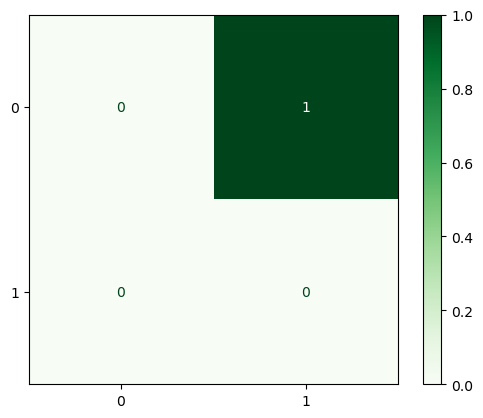

[[-0.52084482 -0.52181039  0.02647625 ... -0.26311733  0.40568653
   0.75741112]
 [-0.50817705 -0.50962018  0.03249453 ... -0.39576893  0.24419558
   0.62223861]
 [-0.51198717 -0.51342352  0.02799587 ... -0.36155023  0.28783014
   0.66087206]
 ...
 [-0.30155739 -0.30502553  0.33785249 ... -1.24722424 -0.54988295
  -0.02241328]
 [-0.30804051 -0.31148537  0.34121608 ... -1.24738374 -0.53456022
  -0.0314517 ]
 [-0.31232803 -0.31583873  0.34350761 ... -1.24530715 -0.52380681
  -0.01425361]]
8/8 [==============================] - 0s 3ms/step
0.6292
8/8 [==============================] - 0s 3ms/step


C:\Users\shaif\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


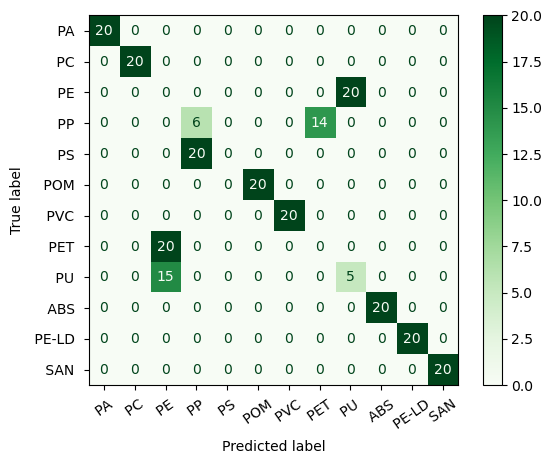

In [31]:
# file1='testing_data.csv'
file1='TESTING_DATA.csv'
# testing_data=pd.read_csv(file1)
# file1='TESTING_DATA.csv'
df_new=pd.read_csv(file1)
df_new['polymer'] = le.fit_transform(df_new['polymer'])
df_new[df_new.columns[2:]]=sc.fit_transform(df_new[df_new.columns[2:]])
X_new = df_new[df_new.columns[[2,3,4,7,8,9,10,13]]].values
Y_new = df_new[df_new.columns[1]].values
print(X_new)
# model.evaluate(X_new, Y_new)
y_pred1 = model.predict(X_new, verbose=1)
y_pred_bool1 = np.argmax(y_pred1, axis=1)
accuracy1=round(accuracy_score(y_true=Y_new, y_pred=y_pred_bool1),4)
print(accuracy1)
plot=plot_confusion_matrix(estimator=classifier, X=X_new, y_true=Y_new,display_labels=class_names,include_values=True,xticks_rotation=degrees,cmap='Greens')

In [22]:
y_pred1 = model.predict(x_hat, batch_size=32, verbose=1)
y_pred_bool1 = np.argmax(y_pred1, axis=1)

precision1=round(precision_score(y_true=y_hat, y_pred=y_pred_bool1,average='weighted'),4)
recall1=round(recall_score(y_true=y_hat, y_pred=y_pred_bool1,average='weighted'),4)
accuracy1=round(accuracy_score(y_true=y_hat, y_pred=y_pred_bool1),4)
F1_score1=round(f1_score(y_true=y_hat, y_pred=y_pred_bool1,average='weighted'),4)

8/8 [==============================] - 0s 4ms/step


ValueError: Mix of label input types (string and number)

In [13]:
accuracy1

0.6292

8/8 [==============================] - 0s 3ms/step


C:\Users\shaif\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


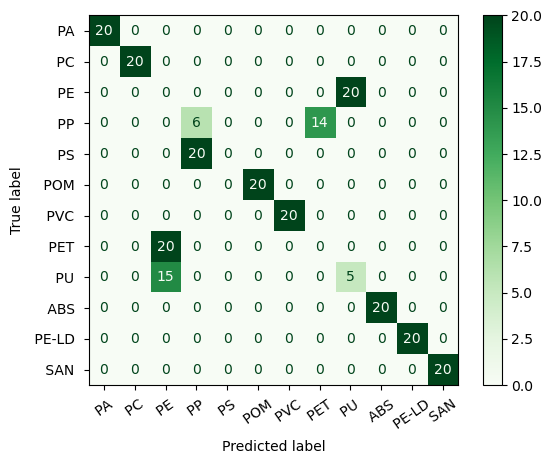

In [15]:
plot=plot_confusion_matrix(estimator=classifier, X=x_hat, y_true=y_hat,display_labels=class_names,include_values=True,xticks_rotation=degrees,cmap='Greens')

In [79]:
reconstructed_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1152      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 16)                1040      
                                                                 
 dense_27 (Dense)            (None, 12)                204       
                                                                 
Total params: 10,652
Trainable params: 10,652
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1152      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 16)                1040      
                                                                 
 dense_27 (Dense)            (None, 12)                204       
                                                                 
Total params: 10,652
Trainable params: 10,652
Non-trainable params: 0
_________________________________________________________________
